In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get the training data

dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')

#print(dfx)
#print(dfy)

#SIZE OF THE DATA(3750,1)
#print(dfx.shape)


#WE WANT TO CONVERT THIS DFX AND DFY INTO LINEAR NUMPY ARRAY. THEREFORE WE WILL RESHAPE THE DATASETS
dfx = dfx.values
dfy = dfy.values

#print(dfx)
#print(dfy)


x = dfx.reshape((-1,))
y = dfy.reshape((-1,))
print(x.shape,y)#these are linear arrays



(3750,) [-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


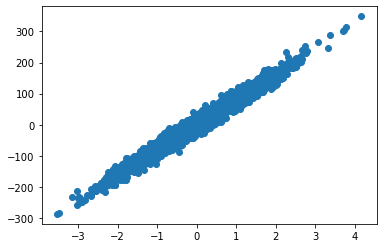

In [3]:
x = (x-x.mean())/x.std()
y = y
plt.scatter(x,y)
plt.show()


In [4]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [5]:
def error(x,y,theta):
    error = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        error += (hx-y[i])**2
    
    return error



In [6]:
def gradient(x,y,theta):
    grad = np.zeros((2,))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
        
    return grad

In [7]:
def gradientDescent(x,y,learning_rate=0.00005):
    theta = np.array([0.0,1.0])
    max_iteration = 1000
    itr = 0
    
    error_list = []
    theta_list = []
    
    while(itr<=max_iteration):
        grad = gradient(x,y,theta)
        err = error(x,y,theta)
        error_list.append(err)
        theta_list.append(theta)
        theta[0] = theta[0]-(learning_rate*grad[0])
        theta[1] = theta[1]-(learning_rate*grad[1])
        
        itr += 1
        
    return theta, error_list, theta_list

In [8]:
final_theta,error_list,theta_list = gradientDescent(x,y)

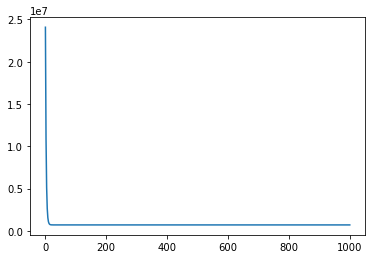

In [9]:
plt.plot(error_list)
plt.show()

In [10]:
print(final_theta)

[ 0.68386897 79.90573694]


In [11]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


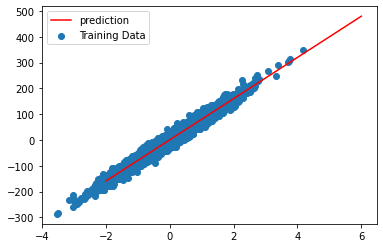

In [12]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest, hypothesis(xtest, final_theta), color='red', label='prediction')
plt.legend()
plt.show()

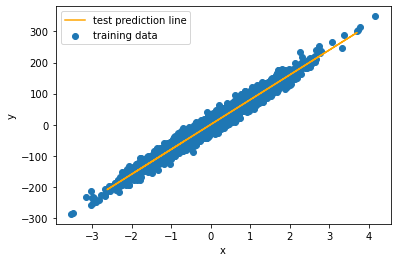

In [13]:
dfxtest=pd.read_csv('Linear_X_test.csv')

xtest2=dfxtest.values.reshape(-1)

plt.scatter(x,y,label='training data')
plt.plot(xtest2,hypothesis(xtest2,final_theta),color='orange',label='test prediction line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()